## PYMACEUTICALS ANALYTICS: Observations and Insights 
Write three observations or inferences that can be made from the data:

 1. When you do not have a way to determine which is the correct data, such as in the case of Mouse ID g989, it is best to thrown out that bad data and keep intact data that you are certain or valid.

 2. Ramicane (a competitor) had slightly similar results as Pymaceuticals' Capomulin drug. The descriptive summary of statistics showed closed numbers of tumor growth of Ramicane mice compared than Capomulin mice. More testing or refining of the Capomulin drug is a recommendation to give to Pymaceuticals so they are not upset with this result (in case they wanted to be the "best" performing product in the market).

 3. When calculating the correlation coefficient and linear regression model of mouse weight and average tumor volume for the Capomulin regimen, weight and tumor volume are positively, highly correlated. 


In [1]:
pwd

'/Users/gigijones/Documents/Berkeley Data Analytics/2_Completed_Week/Week5_Matplotlib_PythonAPI/Homework_Challenge'

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "./Mouse_metadata.csv"
study_results_path = "./Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
pymaceuticals_df = pd.merge(mouse_metadata, study_results, on="Mouse ID",  how="inner")


# Display the data table for preview
pymaceuticals_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
pymaceuticals_df["Mouse ID"].nunique()

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice = pymaceuticals_df[pymaceuticals_df.duplicated(['Mouse ID', 'Timepoint'])]
print(dup_mice)

# The duplicate mice ID is g989

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_ids = pymaceuticals_df[pymaceuticals_df.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
duplicate_mouse_ids

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Extract valid Mouse ID data (i.e., not a duplicate)
clean_mice_df = pymaceuticals_df[pymaceuticals_df['Mouse ID'].isin(duplicate_mouse_ids)==False]
clean_mice_df

# Shows 1893 rows x 8 columns

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice_df = clean_mice_df[(clean_mice_df['Mouse ID'] !='g989')]
clean_mice_df

# Shows 1880 rows x 8 columns

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Checking the number of mice in the clean DataFrame.
clean_mice_df['Mouse ID'].nunique()

# Removed the bad Mouse data from the dataframe

248

In [9]:
# I am checking to see if there is any NaN (just in case!) 
clean_mice_df.isnull().sum()

Mouse ID              0
Drug Regimen          0
Sex                   0
Age_months            0
Weight (g)            0
Timepoint             0
Tumor Volume (mm3)    0
Metastatic Sites      0
dtype: int64

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.


mean_tumor = clean_mice_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median_tumor = clean_mice_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
var_tumor = clean_mice_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
standarddev_tumor = clean_mice_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem_tumor = clean_mice_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()


tumor_summary_stats1_df = pd.DataFrame(
    {"Mean": mean_tumor,
    "Median": median_tumor,
    "Variance": var_tumor,
    "Standard Deviation": standarddev_tumor,
    "Standard Error from the Mean": sem_tumor    
    }
)
print(f'-------Tumor Volume (mm3) Summary Statistics by Drug Treatment-------')
tumor_summary_stats1_df


-------Tumor Volume (mm3) Summary Statistics by Drug Treatment-------


,Mean,Median,Variance,Standard Deviation,Standard Error from the Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

clean_mice_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg([np.mean, np.median, np.var, np.std, st.sem])





,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

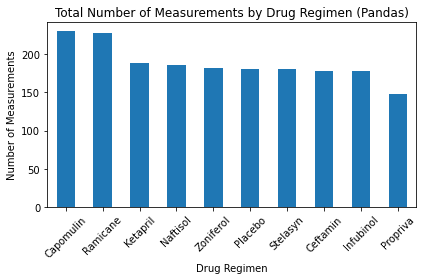

In [21]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

drug_number = clean_mice_df['Drug Regimen'].value_counts()
drug_number.plot(kind="bar", rot=45)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Measurements')
plt.title('Total Number of Measurements by Drug Regimen (Pandas)')
plt.tight_layout()
plt.show()


# SIDEBAR: Testing out another way in pandas
#drug_data = clean_mice_df.groupby('Drug Regimen')
#count_drug_measured = drug_data['Drug Regimen'].count()
#drug_measured_chart = count_drug_measured.plot(kind='bar', figsize=(6,4))

#drug_measured_chart.set_xlabel('Drug Regimen')
#drug_measured_chart.set_ylabel('Number of Measured')


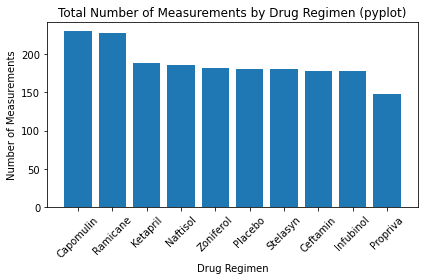

In [22]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

counts = clean_mice_df['Drug Regimen'].value_counts()
plt.bar(counts.index.values,counts.values)

plt.title("Total Number of Measurements by Drug Regimen (pyplot)")

plt.xlabel("Drug Regimen")
plt.xticks(rotation=45)

plt.ylabel("Number of Measurements")
plt.tight_layout()
plt.show()


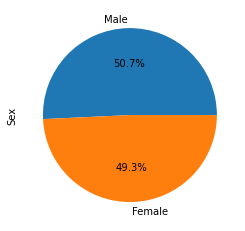

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_counts = clean_mice_df.Sex.value_counts()
gender_counts.plot(kind="pie", autopct='%1.1f%%')
plt.show()

#SIDE BAR: gender_mice = clean_mice_df.groupby('Sex')['Mouse ID'].agg(['nunique']).plot(kind='pie', subplots='True', legend=None)



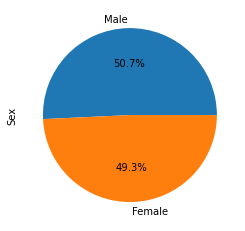

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

counts = clean_mice_df.Sex.value_counts()
plt.pie(counts.values, labels=counts.index.values,autopct='%1.1f%%')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [23]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

last_timepoint_df = clean_mice_df.groupby('Mouse ID')['Timepoint'].max()
last_timepoint_df = last_timepoint_df.reset_index()
last_timepoint_df.head()




,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30


In [24]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

four_regimens_df = last_timepoint_df.merge(clean_mice_df, on=['Mouse ID','Timepoint'], how="left")
print(four_regimens_df.shape)
four_regimens_df.head(10)

(248, 8)


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
5,a401,45,Zoniferol,Female,8,25,66.794156,4
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0
8,a457,10,Ketapril,Female,11,30,49.783419,0
9,a492,45,Stelasyn,Male,20,25,60.122011,1


In [38]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for t in treatments:
        
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = four_regimens_df.loc[four_regimens_df["Drug Regimen"] == t, 'Tumor Volume (mm3)']
    #print(tumor_vol)
    
    # add subset 
    tumor_vol_data.append(tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    
    print(f"{t}'s outlier: {outliers}")
    #print(len(tumor_vol_data))

#Infubinol has the outlier with a tumor volume of 31

Capomulin's outlier: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's outlier: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's outlier: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's outlier: Series([], Name: Tumor Volume (mm3), dtype: float64)


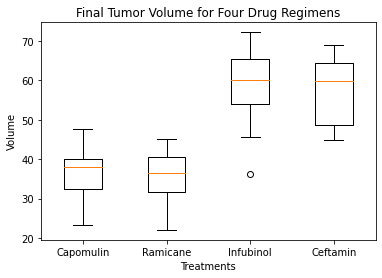

In [44]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume for Four Drug Regimens')
ax1.boxplot(tumor_vol_data, labels=treatments)
ax1.set_xlabel('Treatments')
ax1.set_ylabel('Volume')
plt.show()

## Line and Scatter Plots

In [45]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

clean_mice_df.loc[clean_mice_df['Drug Regimen'] == 'Capomulin', 'Mouse ID']
#Answers:s185, i557, r157
#I'll pick mouse ID s185





10      s185
11      s185
12      s185
13      s185
14      s185
        ... 
440     i557
1452    r157
1453    r157
1454    r157
1455    r157
Name: Mouse ID, Length: 230, dtype: object

In [51]:
# Extract a specific Capomulin mouse's data in a dataframe

capomulin_df = clean_mice_df.loc[clean_mice_df['Drug Regimen'] == 'Capomulin']
capo_mouse_df = capomulin_df.loc[capomulin_df['Mouse ID'] == 's185']
# print(len(capo_mouse_df))
capo_mouse_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


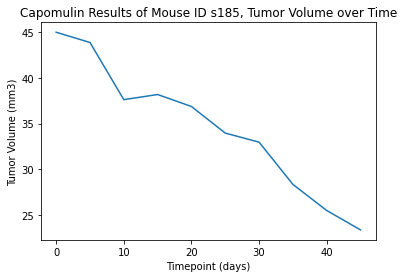

In [52]:
plt.plot(capo_mouse_df['Timepoint'], capo_mouse_df['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin Results of Mouse ID s185, Tumor Volume over Time')
plt.show()

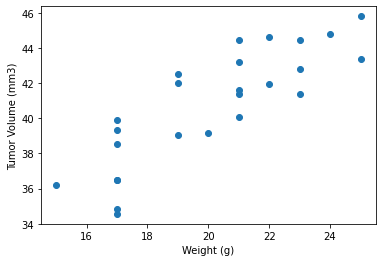

In [58]:
# Generate a scatter plot of averages for both tumor volume vs. mouse weight for the Capomulin regimen
capomulin_df = clean_mice_df.loc[clean_mice_df['Drug Regimen'] == 'Capomulin']
capomulin_avg = capomulin_df.groupby('Mouse ID').mean()
plt.scatter(capomulin_avg['Weight (g)'], capomulin_avg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()


## Correlation and Regression

In [61]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

corr = capomulin_avg.corr()
corr.style.background_gradient(cmap='coolwarm')
# Answer is 0.84. These two data elements are very correlated!

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Age_months,1.000000,-0.074396,-0.352502,0.015190,-0.074090
Weight (g),-0.074396,1.000000,-0.256449,0.841936,-0.218440
Timepoint,-0.352502,-0.256449,1.000000,-0.116552,0.443939
Tumor Volume (mm3),0.015190,0.841936,-0.116552,1.000000,-0.099062
Metastatic Sites,-0.074090,-0.218440,0.443939,-0.099062,1.000000


In [62]:
corr=round(st.pearsonr(capomulin_avg['Weight (g)'], capomulin_avg['Tumor Volume (mm3)'])[0],2)
print(f" The correlation coeffiecient between weight and average tumor volume of treated mice is {corr}.")

 The correlation coeffiecient between weight and average tumor volume of treated mice is 0.84.


Text(0.5, 1.0, 'Linear Regression Model, Capomulin Drug: Mouse Weight and Average Tumor Volume')

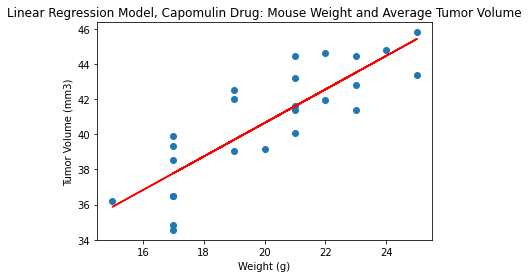

In [65]:
x = st.linregress(capomulin_avg['Weight (g)'], capomulin_avg['Tumor Volume (mm3)'])

y_values = capomulin_avg['Weight (g)']* x[0] + x[1]
plt.scatter(capomulin_avg['Weight (g)'], capomulin_avg['Tumor Volume (mm3)'])
plt.plot(capomulin_avg['Weight (g)'], y_values,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Linear Regression Model, Capomulin Drug: Mouse Weight and Average Tumor Volume')
